In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

print("Start")
anime = pd.read_csv('../input/anime.csv')
rating = pd.read_csv('../input/rating.csv')
print(anime.shape)
print(rating.shape)
print(anime[:1])
print(rating[:1])

Start
(12294, 7)
(7813737, 3)
   anime_id            name   ...   rating members
0     32281  Kimi no Na wa.   ...     9.37  200630

[1 rows x 7 columns]
   user_id  anime_id  rating
0        1        20      -1


In [130]:
rating = rating[rating.rating != -1]
limit_user_id = 1000
limit_anime_id = int(limit_user_id*2)
rating = rating[rating.user_id<=limit_user_id ]
rating = rating[rating.anime_id<=limit_anime_id]

In [131]:
def GetData(X,Y):
  users_data = {}
  movies_data = {}
  first = 0
  for i in range(len(X)):
    #print(row)
    first += 1
    if(first>1):
        userId = X[i][0]
        movieId = X[i][1]
        rating = Y[i]
        if userId not in users_data:
            users_data[userId] = {}
            users_data[userId][movieId] = rating
        else:
            users_data[userId][movieId] = rating
        if movieId not in movies_data:
            movies_data[movieId]= {}
            movies_data[movieId][userId] = rating
        else:
            movies_data[movieId][userId] = rating
  return users_data,movies_data

In [132]:
y = np.array(rating)[:,-1]
X = np.array(rating)[:,:-1]
users_map_data ,items_map_data = GetData(X,y)

In [133]:
def GetDF(data):
    movies =[]
    no = []
    means = []
    for k,v in data.items():
        l = list(v.values())
        no_of_ratings = len(l)
        rating_mean = np.sum(l)/no_of_ratings
        movies.append(k)
        no.append(no_of_ratings)
        means.append(rating_mean)

    d = {'id':movies, 'no_of_ratings':no, 'mean_rating':means}

    df = pd.DataFrame(data=d)
    df.head()
    return df

In [134]:
users_df = GetDF(users_map_data)
items_df = GetDF(items_map_data)

An item on average has 14.596590909090908 ratings


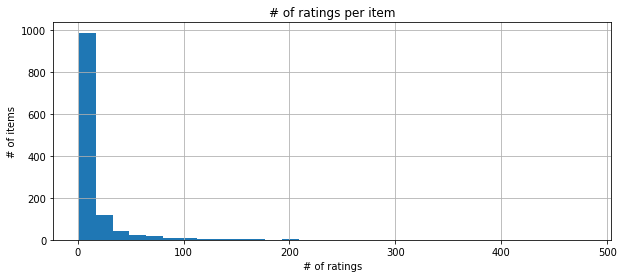

In [135]:
x_val = list(items_df.id)
y_val = list(items_df.no_of_ratings)
from matplotlib import pyplot as plt
#plt.plot(x_val,y_val)
plt.figure(figsize =(10, 4)) 
plt.title('# of ratings per item')
plt.ylabel('# of items')
plt.xlabel('# of ratings')

items_df.no_of_ratings.hist(bins=30)
print('An item on average has',np.mean(items_df.no_of_ratings),'ratings')

An user on average has 21.131609870740306 ratings


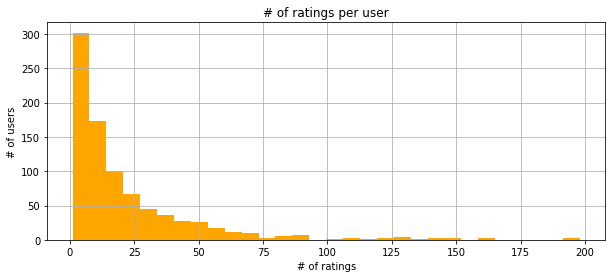

In [136]:
x_val = list(users_df.id)
y_val = list(users_df.no_of_ratings)
from matplotlib import pyplot as plt
#plt.plot(x_val,y_val)
plt.figure(figsize =(10, 4)) 
plt.title('# of ratings per user')
plt.ylabel('# of users')
plt.xlabel('# of ratings')

users_df.no_of_ratings.hist(bins=30,color = "orange")

print('An user on average has',np.mean(users_df.no_of_ratings),'ratings')

In [137]:
rating.rating.value_counts()

8     4634
7     4029
9     3819
10    2710
6     1625
5      655
4      287
3      116
1       55
2       54
Name: rating, dtype: int64

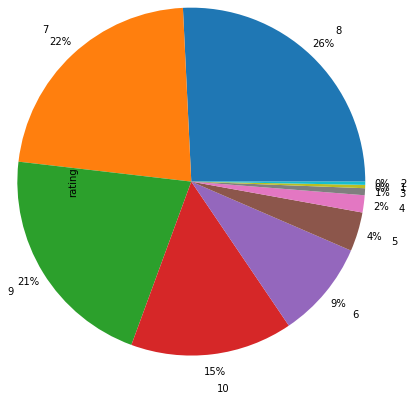

In [138]:
rating.rating.value_counts().plot.pie(radius=2, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)

8     4634
7     4029
9     3819
10    2710
6     1625
5      655
4      287
3      116
1       55
2       54
Name: rating, dtype: int64
55
54
116
287
655
1625
4029
4634
3819
2710


([<matplotlib.patches.Wedge at 0x7fd9a4a25630>,
 [Text(2.3998892278849304, 0.023058488282465584, '1'),
  Text(2.399015158383245, 0.06874787158459618, '2'),
  Text(2.3959160714714227, 0.13995062866934058, '3'),
  Text(2.380137065391711, 0.30813560318232, '4'),
  Text(2.297507009394942, 0.6938742982566146, '5'),
  Text(1.8485581867625602, 1.5306314481785337, '6'),
  Text(-0.2598449024402394, 2.3858919981163904, '7'),
  Text(-2.3968783761623302, -0.12236850038074022, '8'),
  Text(-0.1035228934993093, -2.397766254354567, '9'),
  Text(2.1360505003215318, -1.0942066806943431, '10')],
 [Text(2.19989845889452, 0.021136947592260123, '0%'),
  Text(2.199097228517975, 0.06301888228587983, '0%'),
  Text(2.196256398848804, 0.12828807628022887, '1%'),
  Text(2.181792309942402, 0.28245763625046, '2%'),
  Text(2.1060480919453637, 0.6360514400685634, '4%'),
  Text(1.6945116711990138, 1.4030788274969892, '9%'),
  Text(-0.2381911605702195, 2.1870676649400247, '22%'),
  Text(-2.197138511482136, -0.11217112

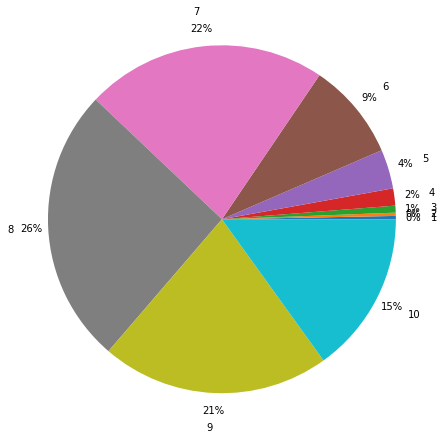

In [139]:
labels = []
sizes =[]
pie_df = rating.rating.value_counts()
print(pie_df)
for i in range(1,11):
    labels.append(i)
    print(pie_df[i])
    sizes.append(pie_df[i])
plt.pie(sizes,labels=labels,autopct='%1.0f%%',radius = 2,pctdistance=1.1, labeldistance=1.2)